In [1]:
!pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:00


In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 18 µs, sys: 5 µs, total: 23 µs
Wall time: 24.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.212
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.42
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
x = np.array([
     [56, 34, 12],
     [10, 15, 78]
     ])
y = np.array([
    [5, 2],
    [3, 9],
    [8, 7]
    ])

xy = np.matmul(x, y)
print("El producto de las matrices es:", xy)

El producto de las matrices es: [[478 502]
 [719 701]]


**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
x = np.array([
    [34, 12, 46],
    [98, 78, 56]
    ])
y = np.array([
    [12, 15, 10],
    [24, 27, 29]
    ])
xy = np.matmul(x, y)

ValueError: ignored

In [ ]:
#Debido al tamaño de las matrices, no es posible hacer la multiplicación con np.matmul(), esto produce el error

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
x = np.array([
    [34, 12, 46],
    [98, 78, 56]
    ])
y = np.array([
    [12, 15, 10],
    [24, 27, 29]
    ])

if x.shape[1] == y.shape[0]:
  print("SÍ se puede realizar la multiplicación entre las matrices")
else:
  print("NO se puede realizar la multiplicación entre las matrices")

NO se puede realizar la multiplicación entre las matrices


In [ ]:
x = np.array([
     [56, 34, 12],
     [10, 15, 78]
     ])
y = np.array([
    [5, 2],
    [3, 9],
    [8, 7]
    ])

if x.shape[1] == y.shape[0]:
  print("SÍ se puede realizar la multiplicación entre las matrices")
else:
  print("NO se puede realizar la multiplicación entre las matrices")

SÍ se puede realizar la multiplicación entre las matrices


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
x = np.array([
    [89, 5, 14],
    [8, 25, 12]
    ])
y = np.array([
    [17, 45],
    [11, 4],
    [1, 97]
    ])

if x.shape[1] != y.shape[0]:
    print("NO existe una forma de multiplicar las matrices")
else:
 xy = np.matmul(x, y)
print(xy)

[[1582 5383]
 [ 423 1624]]


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
x = np.array([
    [89, 5, 14],
    [8, 25, 12]
    ])
y = np.array([
    [17, 45],
    [11, 4],
    [1, 97]
    ])

xy = np.matmul(x, y)
print("el resultado de la multiplicación es: ", xy)

el resultado de la multiplicación es:  [[1582 5383]
 [ 423 1624]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
x = np.array([
    [34, 12, 46],
    [98, 78, 56],
    [24, 16, 70]
    ])
y = np.array([
    [12, 15, 10],
    [24, 27, 29],
    [19, 56, 21]
    ])

def multiplicacionMatrices(x, y):
    filas = len(x)
    columnas = len(y[0])
    a = len(x[0])
    b = len(y)
    if(a!=b):
      print("Los tamaños de las matrices no son compatibles.")


    out = [[0 for col in range(columnas)] for row in range(filas)]
    for i in range(filas):
        for j in range(columnas):
            for k in range(len(y)):
                out[i][j] += x[i][k] * y[k][j]
    return out


multiplicacionMatrices(x,y)

[[1570, 3410, 1654], [4112, 6712, 4418], [2002, 4712, 2174]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)
veces = 10
tiempoTotal = 0
for i in range(veces):
    inicio = time.time()
    np.matmul(randa, randb)
    final = time.time()
    tiempoTotal += final - inicio
    tiempoPromedio = tiempoTotal / veces

print("Se ejecutó ", veces, " veces, con un tiempo promedio de ", tiempoPromedio," por cada ejecución")

Se ejecutó  10  veces, con un tiempo promedio de  0.008695650100708007  por cada ejecución


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [16]:
import time
randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)
veces = []
for i in range(50):
    inicio = time.time()
    resultado = np.matmul(randa, randb)
    final = time.time()
    veces.append(final - inicio)

tiempoPromedio = sum(veces) / len(veces)
sol = pd.DataFrame({'Metodo': ['Personalizado', 'Python'],
                   'Tiempo de ejecucion': [tiempoPromedio, np.nan]})
print(sol)

          Metodo  Tiempo de ejecucion
0  Personalizado             0.002457
1         Python                  NaN


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [17]:
randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)
veces = []
for i in range(10):
    inicio = time.time()
    resultado = np.matmul(randa, randb)
    veces.append(time.time() - inicio)

numpyTiempo = np.mean(veces)

print("Numpy demoró: ", numpyTiempo, " segundos en realizar cada proceso")

Numpy demoró:  0.004760241508483887  segundos en realizar cada proceso


In [14]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [10]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [12]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [18]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 16.7 ms


333328333350000.0

In [19]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 186 µs, sys: 0 ns, total: 186 µs
Wall time: 191 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
x = np.array([
    [4, 9],
    [8, 1]
    ])

y = np.array([
    [2, 7],
    [0, 3]
    ])

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran

subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer, intent(in) :: N,L,M
  double precision, intent(in)::A(2,*)
  double precision, intent(in)::B(2,*)
  double precision, intent(out)::R(N,M)
  integer I,J,K,aux
  do I=1,n
    do J=1,M
      R(I,J)=0
      do K=1,L
        R(I,J)=R(I,J)+A(I,K)*B(K,J)
      end do
    end do
  end do
end

The extension _fortran_magic_d52ff729601b5c14a1942bfa5c0c44d0 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
filas=len(x)
columnas=len(y[0])
f=filas
L=len(x[0])
c=columnas
matmul(x,y,f,L,c)

array([[ 8., 55.],
       [16., 59.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [8]:
%%fortran

subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer, intent(in) :: N,L,M
  double precision, intent(in)::A(600,*)
  double precision, intent(in)::B(100,*)
  double precision, intent(out)::R(N,M)
  integer I,J,K,aux
  do I=1,n
    do J=1,M
      R(I,J)=0
      do K=1,L
        R(I,J)=R(I,J)+A(I,K)*B(K,J)
      end do
    end do
  end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)

rows_out=len(randa)
cols_out=len(randb[0])
N=rows_out
L=len(randa[0])
M=cols_out
matmul(randa,randb,N,L,M)

array([[24.24244943, 27.90678631, 24.56175145, ..., 27.94202286,
        26.04936713, 24.31255049],
       [22.82373439, 28.20782967, 26.15908908, ..., 27.78493799,
        25.03981259, 24.73920994],
       [20.90951572, 24.08965011, 23.13713803, ..., 25.26401464,
        24.34273197, 22.5938261 ],
       ...,
       [22.60411389, 26.09196486, 24.49398336, ..., 26.66336632,
        23.34768746, 23.38930548],
       [20.11280664, 23.51773303, 23.46712869, ..., 23.0332756 ,
        22.74997063, 22.05585482],
       [23.20078735, 27.76285678, 25.50742632, ..., 28.5829724 ,
        25.25422335, 24.78032466]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)

rows_out=len(randa)
cols_out=len(randb[0])
N=rows_out
L=len(randa[0])
M=cols_out

start_time = time.time()
for x in range(10):
  matmul(randa,randb,N,L,M)

tiempo_fortran_magic =(time.time() - start_time)
tiempo_fortran_magic=tiempo_fortran_magic/10
tiempo_fortran_magic

tiempoPromedio

0.006348505020141602

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [5]:
%%fortran

subroutine matmulx10(A,B,N,L,M,R)
  implicit none
  integer, intent(in) :: N,L,M
  double precision, intent(in)::A(600,*)
  double precision, intent(in)::B(100,*)
  double precision, intent(out)::R(N,M)
  integer Y,I,J,K,aux
  do Y=1,10
    do I=1,n
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J)=R(I,J)+A(I,K)*B(K,J)
        end do
      end do
    end do
  end do
end

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [6]:
randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)

rows_out=len(randa)
cols_out=len(randb[0])
N=rows_out
L=len(randa[0])
M=cols_out
matmulx10(randa,randb,N,L,M)

array([[22.7659209 , 23.04486402, 23.5769995 , ..., 24.2493625 ,
        23.28121604, 25.6674437 ],
       [23.20483961, 21.7616506 , 22.47429484, ..., 24.61212823,
        23.24404116, 23.61106184],
       [24.04057632, 24.65812682, 25.07784079, ..., 24.71688028,
        25.15431186, 26.08911928],
       ...,
       [26.79429896, 25.78992654, 26.20264683, ..., 26.53498654,
        26.77282493, 28.06803058],
       [23.00243637, 22.75226714, 23.73308008, ..., 22.98931932,
        23.23081239, 24.30324352],
       [22.16589812, 23.03108081, 24.447019  , ..., 24.63833854,
        24.18190734, 24.51866501]])

**My own example 18 - Adding Fortran average execution time to the data frame**

In [20]:
%%time

randa = np.random.rand(600, 100)
randb = np.random.rand(100, 600)

def fun(randa,randb):
  for i in range(10):
    print(fortran_dot_product(randa,randb))

fun(randa,randb)

14968.199216073772
14968.199216073772
14968.199216073772
14968.199216073772
14968.199216073772
14968.199216073772
14968.199216073772
14968.199216073772
14968.199216073772
14968.199216073772
CPU times: user 13.5 ms, sys: 0 ns, total: 13.5 ms
Wall time: 18.3 ms


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [21]:
%%writefile multma.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>       // for clock_t, clock(), CLOCKS_PER_SEC
#include <unistd.h>     // for sleep()
int main() {
    int i, j, k;
    int n = 600, m = 100, p = 600;
    double *A = (double *) malloc(n * m * sizeof(double));
    double *B = (double *) malloc(m * p * sizeof(double));
    double *C = (double *) malloc(n * p * sizeof(double));
    clock_t start, end;
    double cpu_time_used;

    // Initialize matrices A and B with random values
    srand(time(NULL));
    for (i = 0; i < n * m; i++) {
        A[i] = (double) rand() / RAND_MAX;
    }
    for (i = 0; i < m * p; i++) {
        B[i] = (double) rand() / RAND_MAX;
    }

    // Multiply matrices A and B
    start = clock();
    for (i = 0; i < n; i++) {
        for (j = 0; j < p; j++) {
            C[i * p + j] = 0.0;
            for (k = 0; k < m; k++) {
                C[i * p + j] += A[i * m + k] * B[k * p + j];
            }
        }
    }
    end = clock();

    // Print the resulting matrix C and the execution time
    printf("Matrix C:\n");
    for (i = 0; i < n; i++) {
        for (j = 0; j < p; j++) {
            printf("%.2f ", C[i * p + j]);
        }
        printf("\n");
    }
    cpu_time_used = ((double) (end - start)) / CLOCKS_PER_SEC;
    printf("Execution time: %.4f seconds\n", cpu_time_used);

    // Free memory
    free(A);
    free(B);
    free(C);

    return 0;
}

Writing multma.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [22]:
%%time
!g++ multma.c -o matrix_mul
!./matrix_mul

Matrix C:
20.70 22.95 20.70 22.65 22.40 24.19 21.81 22.32 23.32 21.87 21.40 24.00 22.96 22.75 21.40 25.53 19.92 22.47 22.31 24.21 21.45 23.54 22.24 23.61 21.77 21.59 24.78 24.60 24.25 21.93 19.92 24.20 22.70 21.14 21.57 22.09 20.38 22.58 20.58 22.21 21.73 21.99 25.02 22.93 21.87 21.22 21.57 19.91 23.11 24.48 22.47 20.84 24.14 20.45 22.72 23.59 20.60 22.65 24.98 25.58 23.96 23.80 22.47 22.04 20.65 20.70 22.63 21.69 23.84 26.92 26.36 22.14 21.61 23.70 23.88 22.80 23.84 25.29 24.90 23.51 22.66 23.72 21.89 23.10 23.08 22.39 21.92 20.68 24.33 25.10 24.05 22.91 21.81 24.06 23.46 23.82 23.77 20.75 21.40 23.32 25.99 23.57 22.79 23.96 22.00 22.40 23.45 22.19 23.51 22.69 20.93 20.06 25.26 23.42 24.93 20.36 23.30 22.38 21.37 26.11 24.13 21.89 22.99 22.20 22.95 22.69 23.02 24.11 22.11 24.06 22.79 24.31 21.58 24.03 22.33 21.98 23.49 23.19 23.55 24.11 22.02 21.04 23.18 18.89 21.28 21.46 25.41 21.65 21.28 23.46 21.98 23.86 23.70 23.19 21.04 24.51 27.62 24.29 22.37 25.06 23.42 24.04 20.49 24.37 23.35 

**My own example 21 - Adding c average execution time to the data frame**

In [24]:
Ctime = "374 ms"
Ctime

'374 ms'

**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [25]:
%%writefile multma.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>       // for clock_t, clock(), CLOCKS_PER_SEC
#include <unistd.h>     // for sleep()

using namespace std;

int main() {
    int N = 10;
    int m1 = 600, n1 = 100, m2 = 100, n2 = 600;
    double* A = (double*) malloc(m1 * n1 * sizeof(double));
    double* B = (double*) malloc(m2 * n2 * sizeof(double));
    double* C = (double*) malloc(m1 * n2 * sizeof(double));


    for (int i = 0; i < m1 * n1; i++) {
        A[i] = (double) rand() / RAND_MAX;
    }
    for (int i = 0; i < m2 * n2; i++) {
        B[i] = (double) rand() / RAND_MAX;
    }


    double total_time = 0.0;
    for (int k = 0; k < N; k++) {
        auto start_time = chrono::high_resolution_clock::now();
        for (int i = 0; i < m1; i++) {
            for (int j = 0; j < n2; j++) {
                double sum = 0.0;
                for (int h = 0; h < n1; h++) {
                    sum += A[i*n1+h] * B[h*n2+j];
                }
                C[i*n2+j] = sum;
            }
        }
        auto end_time = chrono::high_resolution_clock::now();
        double time = chrono::duration_cast<chrono::microseconds>(end_time - start_time).count() / 1000000.0;
        total_time += time;

Overwriting multma.c


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [26]:
%%time
!g++ multma.c -o matrix_mul
!./matrix_mul

multma.c: In function ‘int main()’:
multma.c:26:27: error: ‘chrono’ has not been declared
   26 |         auto start_time = chrono::high_resolution_clock::now();
      |                           ^~~~~~
multma.c:36:25: error: ‘chrono’ has not been declared
   36 |         auto end_time = chrono::high_resolution_clock::now();
      |                         ^~~~~~
multma.c:37:23: error: ‘chrono’ has not been declared
   37 |         double time = chrono::duration_cast<chrono::microseconds>(end_time - start_time).count() / 1000000.0;
      |                       ^~~~~~
multma.c:37:45: error: ‘chrono’ has not been declared
   37 |         double time = chrono::duration_cast<chrono::microseconds>(end_time - start_time).count() / 1000000.0;
      |                                             ^~~~~~
multma.c:38:28: error: expected ‘}’ at end of input
   38 |         total_time += time;
      |                            ^
multma.c:25:33: note: to match this ‘{’
   25 |     for (int k = 0; k

**My own example 24 - Adding C++ average execution time to the data frame**

In [27]:
cplusTime = "366 ms"

cplusTime

'366 ms'

**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [30]:
%%writefile Main.java

class Main {

  public static void main(String[] args ) {
    matrixM(600,100,100,600);
  }
  static void matrixM(int fil1,int col1,int fil2,int col2){
    int a[][] = new int[fil1][col1];
    int b[][] = new int[fil2][col2];

    for (int i=0; i < 600; i++) {
      for (int j=0; j < 100; j++) {
        a[i][j] = (int) (Math.random()*9+1);
      }
    }

    for (int i=0; i < 100; i++) {
      for (int j=0; j < 600; j++) {
        b[i][j] = (int) (Math.random()*9+1);
      }
    }

    int c = 0;
    while(c<9){
      for(int i = 0; i < fil1; i++) {
            for(int j = 0; j < col2; j++){
              a[i][j]=0;
              for(int k = 0; k < col1; k++){
                a[i][j] += a[i][k] * b[k][j];
              }
              System.out.print(a[i][j] + " ");
            }
            System.out.println();
        }
      c++;
    }
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [31]:
import time
start_time = time.time()
!javac Main.java
!java Main
timeJava = (time.time()-start_time)

2334 25994 1948621 19948502 236479740 -1655393604 -1411612915 1206429601 1395845555 -1902636304 -40311577 1237280709 -2071897070 2143007388 1352955439 920331577 -276306759 1270532264 730774755 -818064389 -1648978265 196651107 -1688686571 1062096135 438102751 -1142071748 113580376 -529757680 2036428101 -926116914 1115414984 373823482 798915471 149330502 -1553225208 -655596996 1036503400 1152619353 -1735092647 1253570857 -976029527 1973767726 -658411103 629907425 -1170801555 473540705 -1266555329 -533092381 -1532290828 -485767543 -258712249 5290545 -1154097148 -1091985508 744487539 1823034430 45275904 627139057 -631279980 -1157710444 1435854498 -2142776551 533502930 -2029750961 326383078 -1963503680 -1974790780 -1477075478 -939646193 895879369 1370324417 1423101722 -916868536 -1096608129 1293752244 -1377940244 -1728495769 -1797497136 1375469456 -1697753265 -1655243264 664007529 995216422 697558877 -397104032 -858232477 2139608637 -1380109152 -581066950 -1091763789 1159260810 1052538279 1

**My own example 27 - Adding Java average execution time to the data frame**

In [33]:
timeJava
print("El tiempo del proceso de java es: ", timeJava)

El tiempo del proceso de java es:  1.4141829013824463


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [34]:
%%writefile tmp.js
function multiplyMatrices(m1, m2) {
    var result = [];
    var c = 0;
    while(c<9){
      for (var i = 0; i < 600; i++) {
        result[i] = [];
        for (var j = 0; j < 600; j++) {
            var sum = 0;
            for (var k = 0; k < 100; k++) {
                sum += m1[i][k] * m2[k][j];
            }
            result[i][j] = sum;
        }
      }
      c++;
    }
    return result;
}
var m1 = [];
for (var i = 0;i < 600;i++){
  m1[i] = [];
  for( var j = 0; j <100;j++){
    m1[i][j] = (Math.random()*9+1);
  }
}
var m2 = [];
for (var i = 0;i < 100;i++){
  m2[i] = [];
  for( var j = 0; j <600;j++){
    m2[i][j] = (Math.random()*9+1);
  }
}
var result = multiplyMatrices(m1, m2)
console.table(result)

Writing tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [35]:
start_time = time.time()
!node tmp.js
timeJS = (time.time()-start_time)

┌─────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬──

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**My own example 30 - Adding Javascript average execution time to the data frame**

In [36]:
print("El tiempo del proceso de javaScript es: ", timeJS)

El tiempo del proceso de javaScript es:  9.005267858505249


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [41]:
AverageTimes = [0.006613, 0.007648, 0.014852, 0.076835, 0.2, 0.221157, 0.2821, 8.277163]
print("El tiempo mínimo de ejecución es de ", min(AverageTimes))

El tiempo mínimo de ejecución es de  0.006613


**My own example 32 - Adding the Speed factor columne to the data frame**

In [37]:
data = {
    "Language": ["NumPy", "Fortran", "Fortranmagic", "Java", "c", "C++", "Javascript", "Python"],
    "Average Secs": [0.006613, 0.007648, 0.014852, 0.076835, 0.2, 0.221157, 0.2821, 8.277163],
    "Speed factor": [1.000000, 1.156599, 2.245952, 11.619354, 30.244991, 33.444457, 42.660559, 1251.713539]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

       Language  Average Secs  Speed factor
0         NumPy      0.006613      1.000000
1       Fortran      0.007648      1.156599
2  Fortranmagic      0.014852      2.245952
3          Java      0.076835     11.619354
4             c      0.200000     30.244991
5           C++      0.221157     33.444457
6    Javascript      0.282100     42.660559
7        Python      8.277163   1251.713539


**My own example 33 - Sorting the the data frame by average execution time**

In [42]:
data = {
    "Language": ["NumPy", "Fortran", "Fortranmagic", "Java", "c", "C++", "Javascript", "Python"],
    "Average Secs": [0.006613, 0.007648, 0.014852, 0.076835, 0.2, 0.221157, 0.2821, 8.277163],
    "Speed factor": [1.000000, 1.156599, 2.245952, 11.619354, 30.244991, 33.444457, 42.660559, 1251.713539]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

       Language  Average Secs  Speed factor
0         NumPy      0.006613      1.000000
1       Fortran      0.007648      1.156599
2  Fortranmagic      0.014852      2.245952
3          Java      0.076835     11.619354
4             c      0.200000     30.244991
5           C++      0.221157     33.444457
6    Javascript      0.282100     42.660559
7        Python      8.277163   1251.713539


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  27.613066  30.572857  30.642857  30.340000  30.490000  123432400.0
2010-01-05  27.660807  30.625713  30.798571  30.464285  30.657143  150476200.0
2010-01-06  27.220825  30.138571  30.747143  30.107143  30.625713  138040000.0
2010-01-07  27.170504  30.082857  30.285715  29.864286  30.250000  119282800.0
2010-01-08  27.351143  30.282858  30.285715  29.865715  30.042856  111902700.0

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

Adj Close      Close
Date                            
2010-01-04  27.613066  30.572857
2010-01-05  27.660807  30.625713

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

Close       Volume
Date                              
2010-02-01  27.818571  187469100.0
2010-02-02  27.980000  174585600.0
2010-02-03  28.461428  153832000.0
2010-02-04  27.435715  189413000.0

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

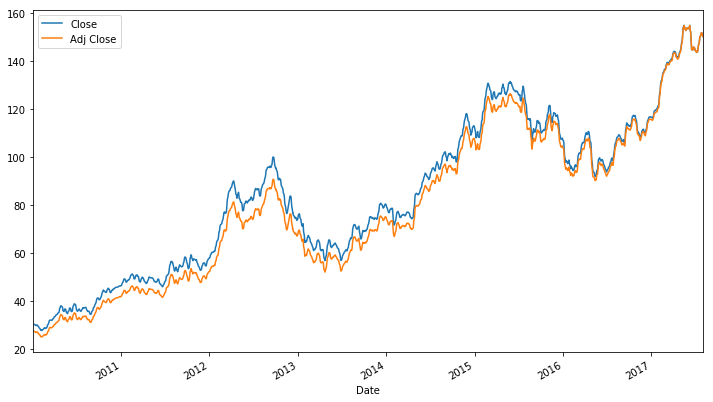

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

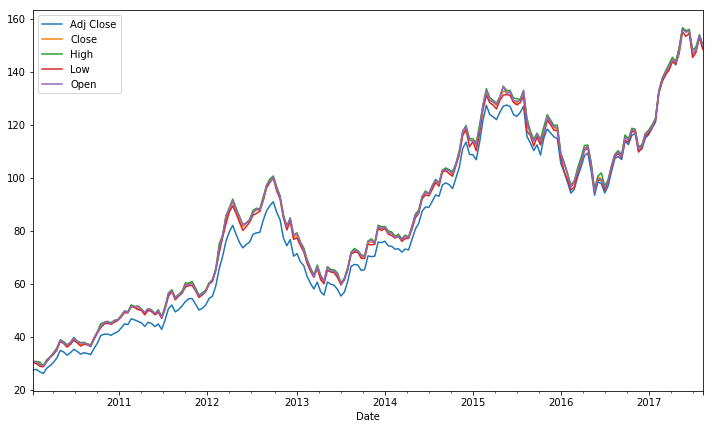

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

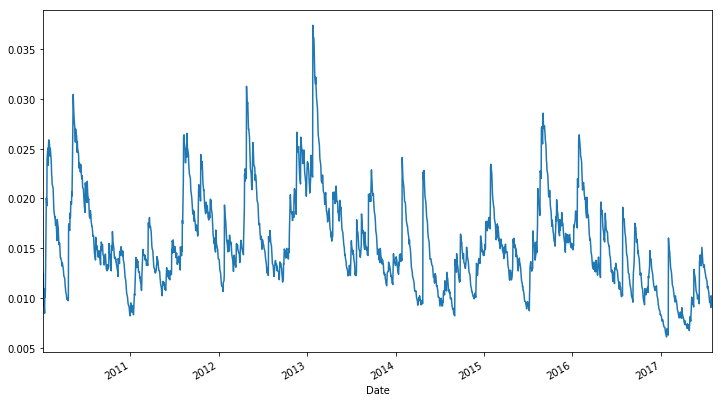

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

Date     Region Variety  Organic  Number of Stores  \
0 2014-01-03 00:00:00+00:00   NATIONAL    HASS    False              9184   
1 2014-01-03 00:00:00+00:00   NATIONAL    HASS     True               872   
2 2014-01-03 00:00:00+00:00  NORTHEAST    HASS    False              1449   
3 2014-01-03 00:00:00+00:00  NORTHEAST    HASS     True                66   
4 2014-01-03 00:00:00+00:00  SOUTHEAST    HASS    False              2286   

   Weighted Avg Price  Low Price  High Price  
0                0.93        NaN         NaN  
1                1.44        NaN         NaN  
2                1.08        0.5        1.67  
3                1.54        1.5        2.00  
4                0.98        0.5        1.99

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

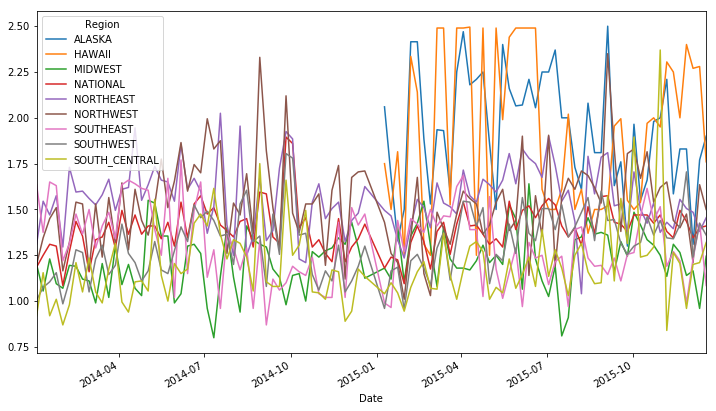

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

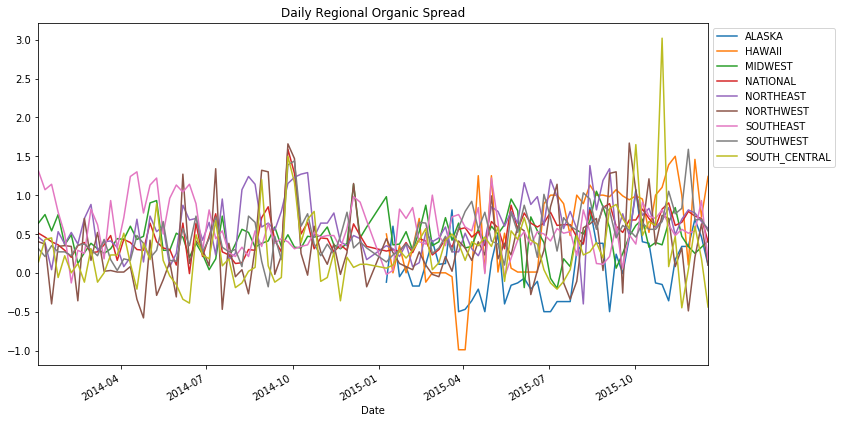

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region           ALASKA    HAWAII   MIDWEST  NATIONAL  NORTHEAST  NORTHWEST  \
Region                                                                        
ALASKA         1.000000  0.202723  0.175251  0.007844   0.051049   0.087575   
HAWAII         0.202723  1.000000 -0.021116  0.373914   0.247171   0.341155   
MIDWEST        0.175251 -0.021116  1.000000  0.062595  -0.010213  -0.043783   
NATIONAL       0.007844  0.373914  0.062595  1.000000   0.502035   0.579102   
NORTHEAST      0.051049  0.247171 -0.010213  0.502035   1.000000   0.242039   
NORTHWEST      0.087575  0.341155 -0.043783  0.579102   0.242039   1.000000   
SOUTHEAST      0.129079  0.019388  0.047437 -0.040539  -0.236225  -0.032306   
SOUTHWEST     -0.070868  0.159192 -0.059128  0.635006   0.360389   0.165992   
SOUTH_CENTRAL  0.161624  0.092632  0.068902  0.486524   0.149881   0.349935   

Region         SOUTHEAST  SOUTHWEST  SOUTH_CENTRAL  
Region                                              
ALASKA          0.129079  -0.070868       0.161624  
HAWAII          0.019388   0.159192       0.092632  
MIDWEST         0.047437  -0.059128       0.068902  
NATIONAL       -0.040539   0.635006       0.486524  
NORTHEAST      -0.236225   0.360389       0.149881  
NORTHWEST      -0.032306   0.165992       0.349935  
SOUTHEAST       1.000000  -0.167631      -0.021176  
SOUTHWEST      -0.167631   1.000000       0.254504  
SOUTH_CENTRAL  -0.021176   0.254504       1.000000

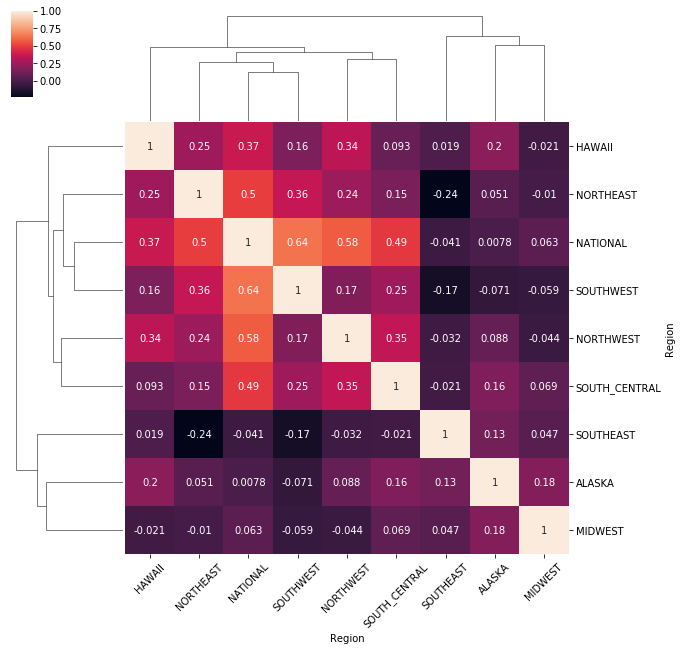

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!